# 라이브러리 로드

In [20]:
# 데이터 분석에 사용할 라이브러리
import pandas as pd
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# error 창 안 보이게 해줌
import logging
logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)

# 가용폰트 확인
for font in mpl.font_manager.findSystemFonts():
    # print(mpl.font_manager.FontProperties(fname=font).get_name())
    mpl.font_manager.fontManager.addfont(font)

# Set font family globally
mpl.rcParams['font.family'] = 'NanumBarunGothic'# 폰트명
print(mpl.rcParams['font.family'])

['NanumBarunGothic']


# 데이터 로드

In [21]:
import easydict
args = easydict.EasyDict()

# path 정보
args.default_path = 'C:/titanic_datas/'
args.train_csv = args.default_path+'train.csv'
args.test_csv = args.default_path+'test.csv'
args.default_submission_csv = args.default_path+'submission.csv'

args.submission_csv = args.default_path+'result/submission_0220.csv'
args.save_results = args.default_path+"result/model_results.json"

# 데이터 분석을 위한 변수들
args.random_state = 21
args.results = []

# Titanic 데이터

In [22]:
DATA_PATH = "C:/titanic_datas/"

df = pd.read_csv(DATA_PATH+"train.csv")
df.head()

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,0,2,"Wheeler, Mr. Edwin Frederick""""",male,NaN,0,0,SC/PARIS 2159,12.8750,NaN,S
1,1,0,3,"Henry, Miss. Delia",female,NaN,0,0,382649,7.7500,NaN,Q
2,2,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5000,B69,S
3,3,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S
4,4,0,2,"Hold, Mr. Stephen",male,44.0,1,0,26707,26.0000,NaN,S


In [23]:
ori_train = pd.read_csv(args.train_csv)
ori_test = pd.read_csv(args.test_csv)

ori_train.shape, ori_test.shape

((916, 12), (393, 11))

In [24]:
pd.read_csv(args.default_submission_csv).shape

(393, 2)

In [25]:
ori_train.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'gender', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [26]:
ori_test.columns

Index(['passengerid', 'pclass', 'name', 'gender', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [27]:
ori_train.head()

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,0,2,"Wheeler, Mr. Edwin Frederick""""",male,NaN,0,0,SC/PARIS 2159,12.8750,NaN,S
1,1,0,3,"Henry, Miss. Delia",female,NaN,0,0,382649,7.7500,NaN,Q
2,2,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5000,B69,S
3,3,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S
4,4,0,2,"Hold, Mr. Stephen",male,44.0,1,0,26707,26.0000,NaN,S


In [28]:
ori_train[['passengerid']].head()

,passengerid
0,0
1,1
2,2
3,3
4,4


In [29]:
ori_train.drop('passengerid', axis=1, inplace=True)
ori_train.head()

,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,2,"Wheeler, Mr. Edwin Frederick""""",male,NaN,0,0,SC/PARIS 2159,12.8750,NaN,S
1,0,3,"Henry, Miss. Delia",female,NaN,0,0,382649,7.7500,NaN,Q
2,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5000,B69,S
3,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S
4,0,2,"Hold, Mr. Stephen",male,44.0,1,0,26707,26.0000,NaN,S


In [30]:
ori_test.set_index(['passengerid'], inplace=True)
print(f'{ori_test.shape}')
ori_test.head()

(393, 10)


,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
passengerid,,,,,,,,,,
916,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q
917,2,"Pinsky, Mrs. (Rosa)",female,32.0,0,0,234604,13.0000,NaN,S
918,3,"McCarthy, Miss. Catherine Katie""""",female,NaN,0,0,383123,7.7500,NaN,Q
919,3,"Franklin, Mr. Charles (Charles Fardon)",male,NaN,0,0,SOTON/O.Q. 3101314,7.2500,NaN,S
920,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S


In [31]:
ori_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  916 non-null    int64  
 1   pclass    916 non-null    int64  
 2   name      916 non-null    object 
 3   gender    916 non-null    object 
 4   age       736 non-null    float64
 5   sibsp     916 non-null    int64  
 6   parch     916 non-null    int64  
 7   ticket    916 non-null    object 
 8   fare      916 non-null    float64
 9   cabin     198 non-null    object 
 10  embarked  915 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 78.8+ KB


# train_test_split

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
ori_te = ori_test.copy()

y = ori_train['survived']
X = ori_train.drop(['survived'], axis=1)

In [34]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3, stratify=ori_train['survived'], random_state=args.random_state)

X_tr.shape, X_te.shape, y_tr.shape, y_te.shape

((641, 10), (275, 10), (641,), (275,))

# EDA

In [35]:
plt.style.use('seaborn-white')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

How many Survived??

gender

NameError: name 'ori_tr' is not defined

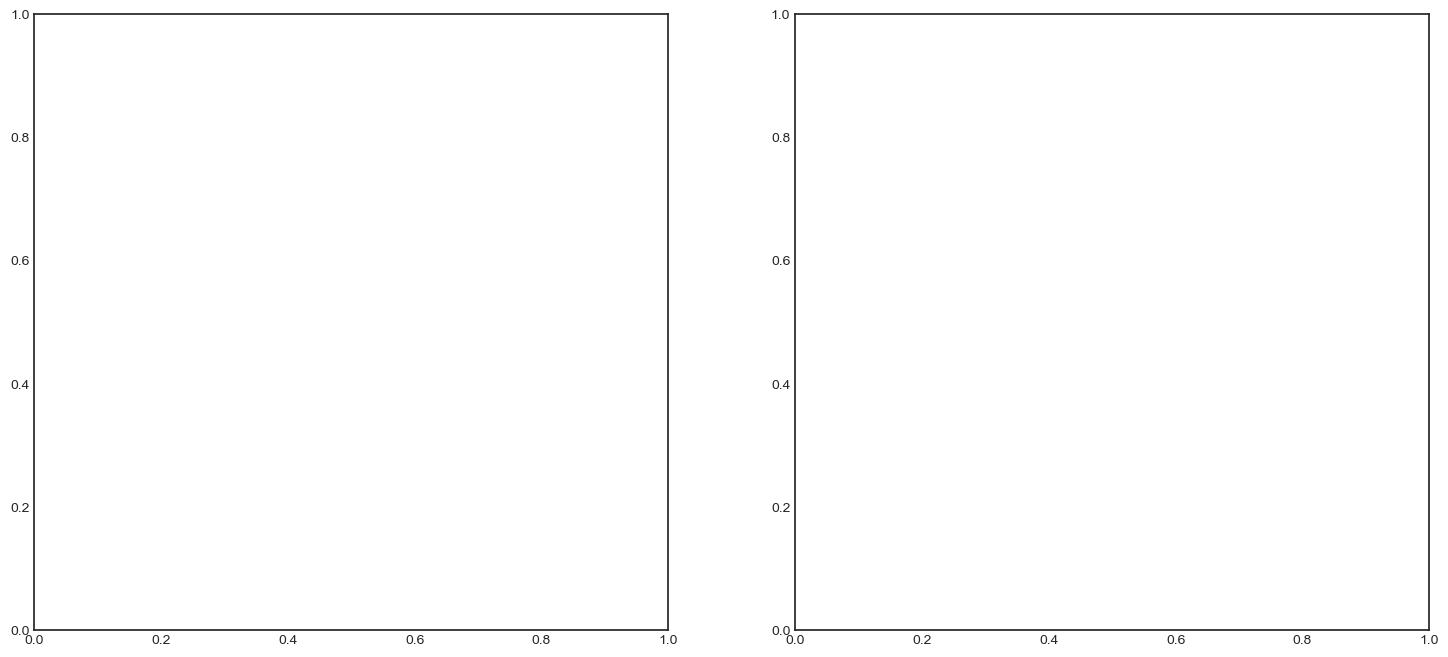

In [36]:
f,ax=plt.subplots(1,2,figsize=(18,8))
ori_tr['survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('survived')
ax[0].set_ylabel('')
sns.countplot('survived',data=ori_tr,ax=ax[1])
ax[1].set_title('survived')
plt.show()

In [ ]:
ori_tr.groupby(['gender','survived'])['survived'].count()

gender  survived
female  0            54
        1           273
male    0           516
        1            73
Name: survived, dtype: int64

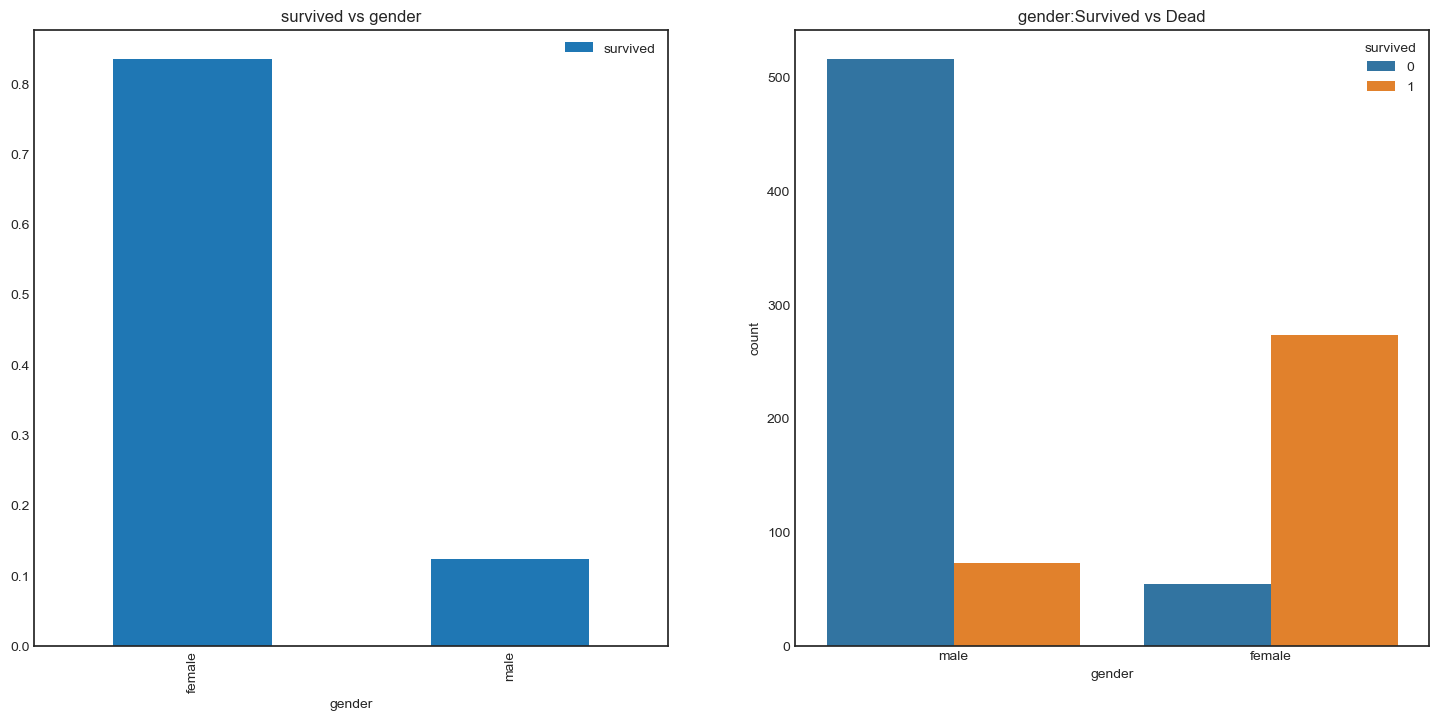

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
ori_tr[['gender','survived']].groupby(['gender']).mean().plot.bar(ax=ax[0])
ax[0].set_title('survived vs gender')
sns.countplot('gender',hue='survived',data=ori_tr,ax=ax[1])
ax[1].set_title('gender:Survived vs Dead')
plt.show()

pclass

In [ ]:
pd.crosstab(ori_tr.pclass,ori_tr.survived,margins=True).style.background_gradient(cmap='summer_r')

survived,0,1,All
pclass,,,
1,96,131,227
2,118,76,194
3,356,139,495
All,570,346,916


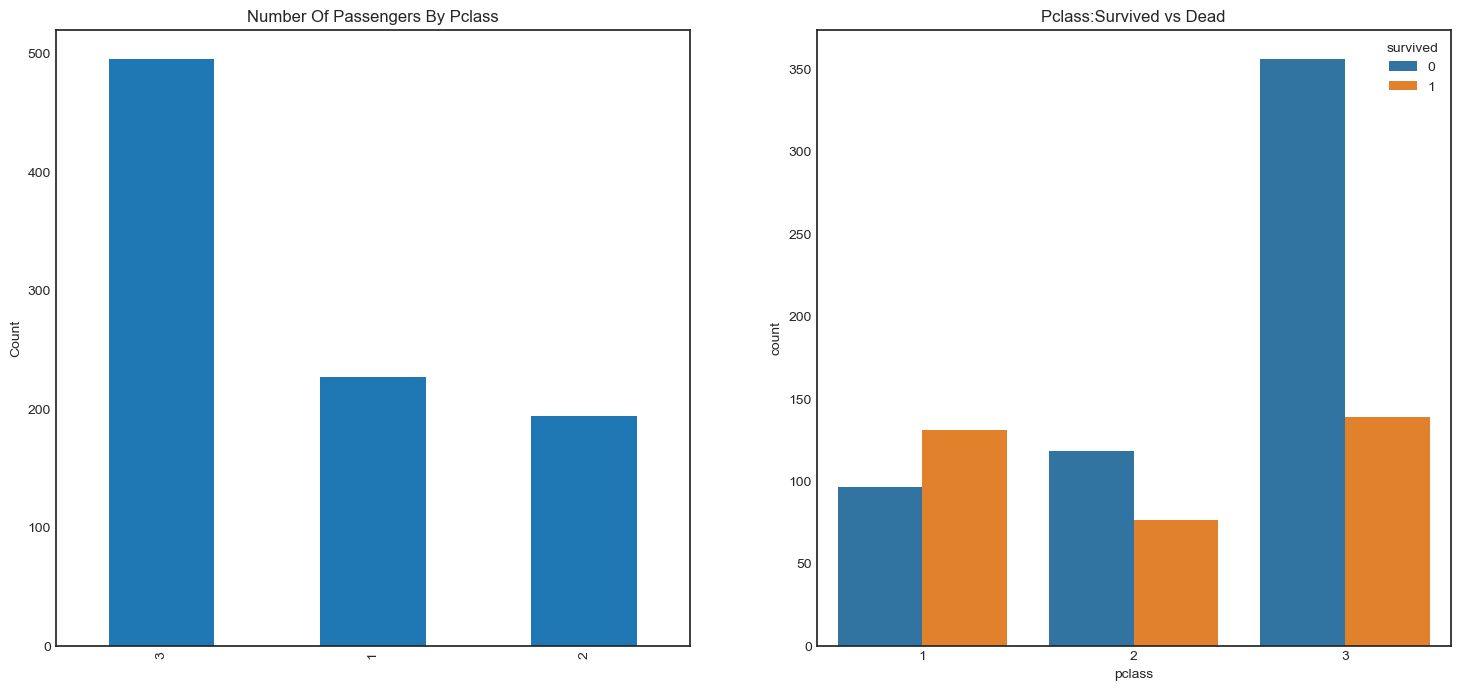

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
ori_tr['pclass'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('pclass',hue='survived',data=ori_tr,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

In [ ]:
pd.crosstab([ori_tr.gender, ori_tr.survived],ori_tr.pclass,margins=True).style.background_gradient(cmap='summer_r')

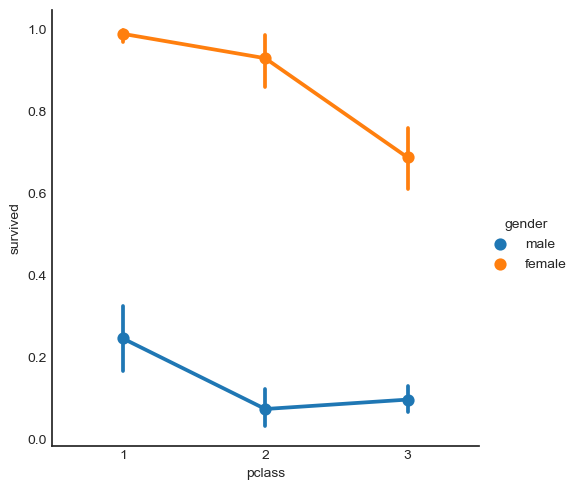

In [ ]:
sns.factorplot('pclass','survived',hue='gender',data=ori_tr)
plt.show()

age

In [ ]:
print('Oldest Passenger was of:',ori_tr['age'].max(),'Years')
print('Youngest Passenger was of:',ori_tr['age'].min(),'Years')
print('Average Age on the ship:',ori_tr['age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.17 Years
Average Age on the ship: 29.69836956521739 Years


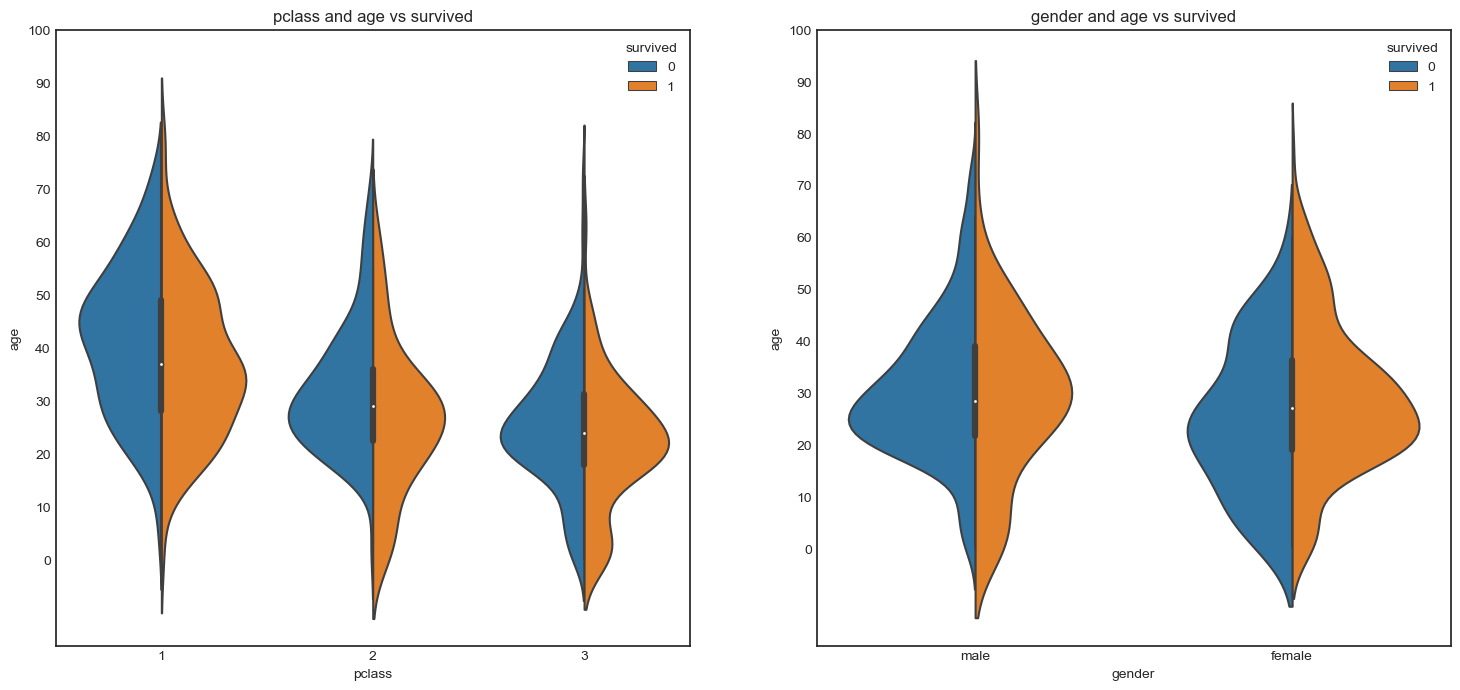

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("pclass","age", hue="survived", data=ori_tr,split=True,ax=ax[0])
ax[0].set_title('pclass and age vs survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("gender","age", hue="survived", data=ori_tr,split=True,ax=ax[1])
ax[1].set_title('gender and age vs survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

In [ ]:
ori_tr['initial']=0
for i in ori_tr:
    ori_tr['initial']=ori_tr.name.str.extract('([A-Za-z]+)\.') 

In [ ]:
pd.crosstab(ori_tr.initial, ori_tr.gender).T.style.background_gradient(cmap='summer_r') 
#Checking the Initials with the Sex

initial,Capt,Col,Countess,Don,Dr,Jonkheer,Major,Master,Miss,Mlle,Mr,Mrs,Ms,Rev,Sir
gender,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,0,0,185,1,0,138,1,0,0
male,1,3,0,1,4,1,2,42,0,0,528,0,0,6,1


In [ ]:
ori_tr['initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [ ]:
ori_tr.groupby('initial')['age'].mean() #lets check the average age by Initials

initial
Master     5.352286
Miss      21.788693
Mr        32.264286
Mrs       36.796610
Other     44.400000
Name: age, dtype: float64

Filling NaN Ages

In [ ]:
ori_tr.loc[(ori_tr.age.isnull())&(ori_tr.initial=='Mr'),'age']=33
ori_tr.loc[(ori_tr.age.isnull())&(ori_tr.initial=='Mrs'),'age']=36
ori_tr.loc[(ori_tr.age.isnull())&(ori_tr.initial=='Master'),'age']=5
ori_tr.loc[(ori_tr.age.isnull())&(ori_tr.initial=='Miss'),'age']=22
ori_tr.loc[(ori_tr.age.isnull())&(ori_tr.initial=='Other'),'age']=46

In [ ]:
ori_tr.age.isnull().any() #So no null values left finally 

False

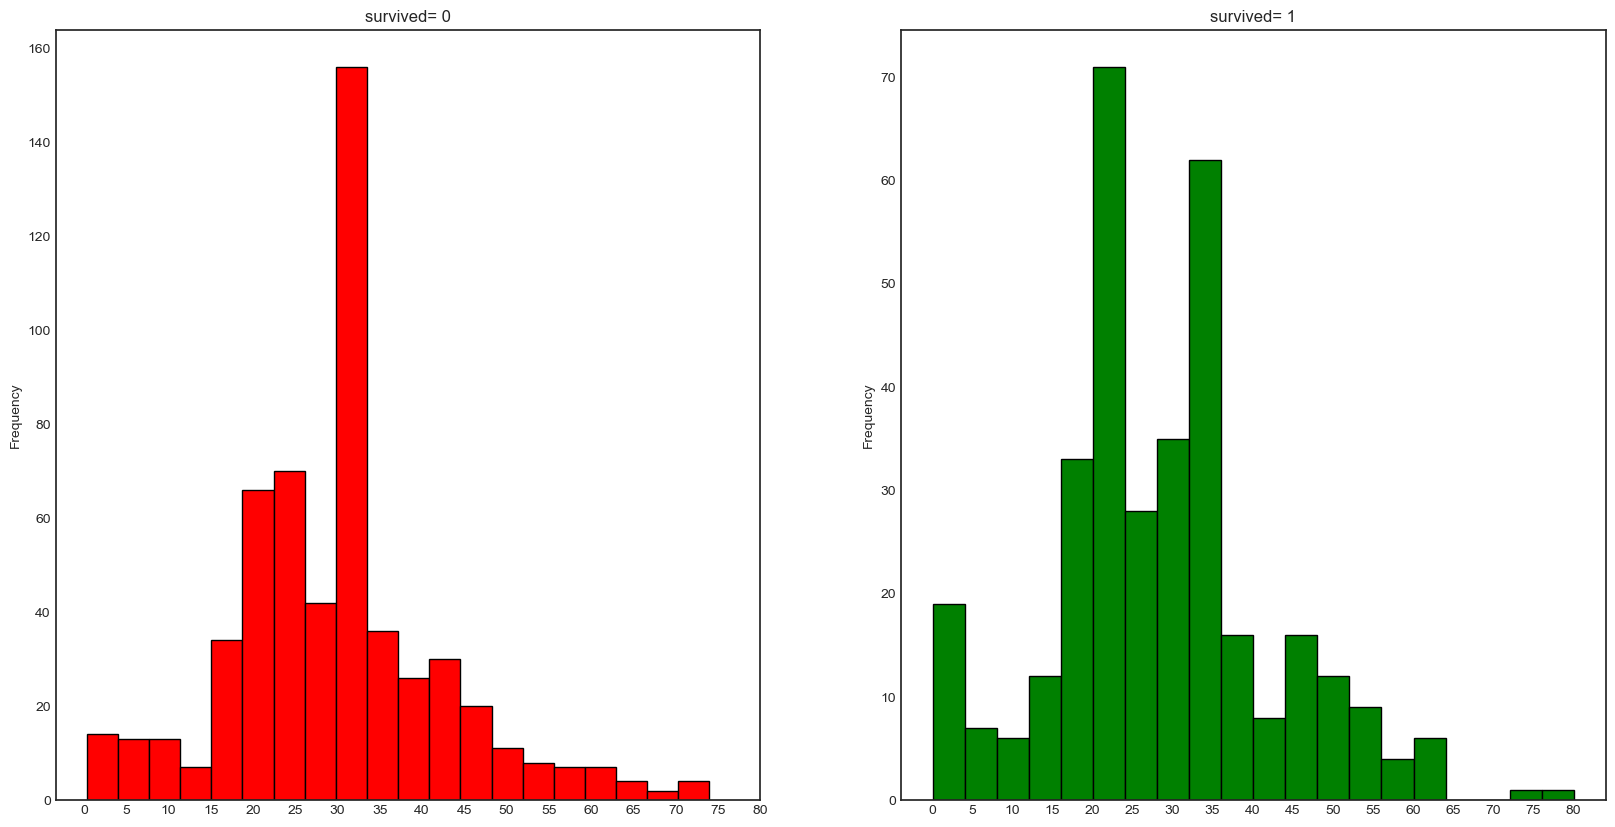

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,10))
ori_tr[ori_tr['survived']==0].age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
ori_tr[ori_tr['survived']==1].age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

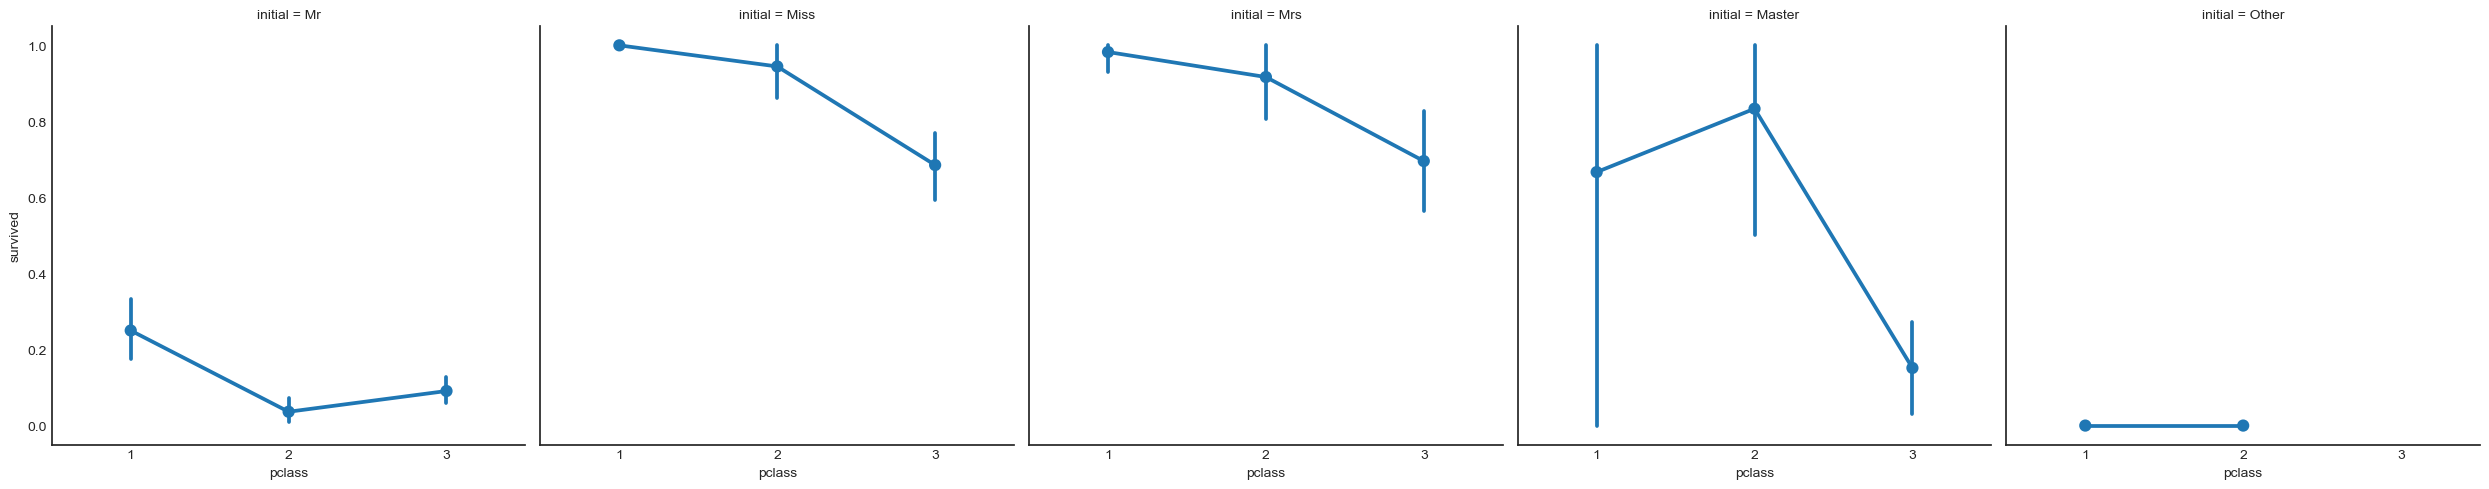

In [ ]:
sns.factorplot('pclass','survived',col='initial',data=ori_tr)
plt.show()

Embarked--> Categorical Value

In [ ]:
pd.crosstab([ori_tr.embarked,ori_tr.pclass],[ori_tr.gender,ori_tr.survived],margins=True).style.background_gradient(cmap='summer_r')

Chances for Survival by Port Of Embarkation

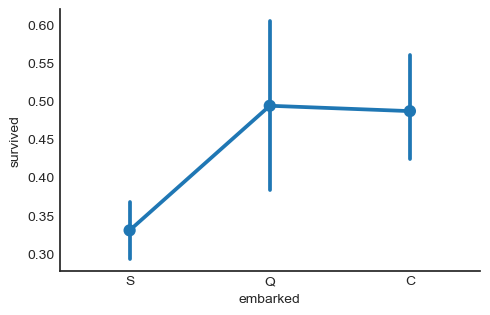

In [ ]:
sns.factorplot('embarked','survived',data=ori_tr)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

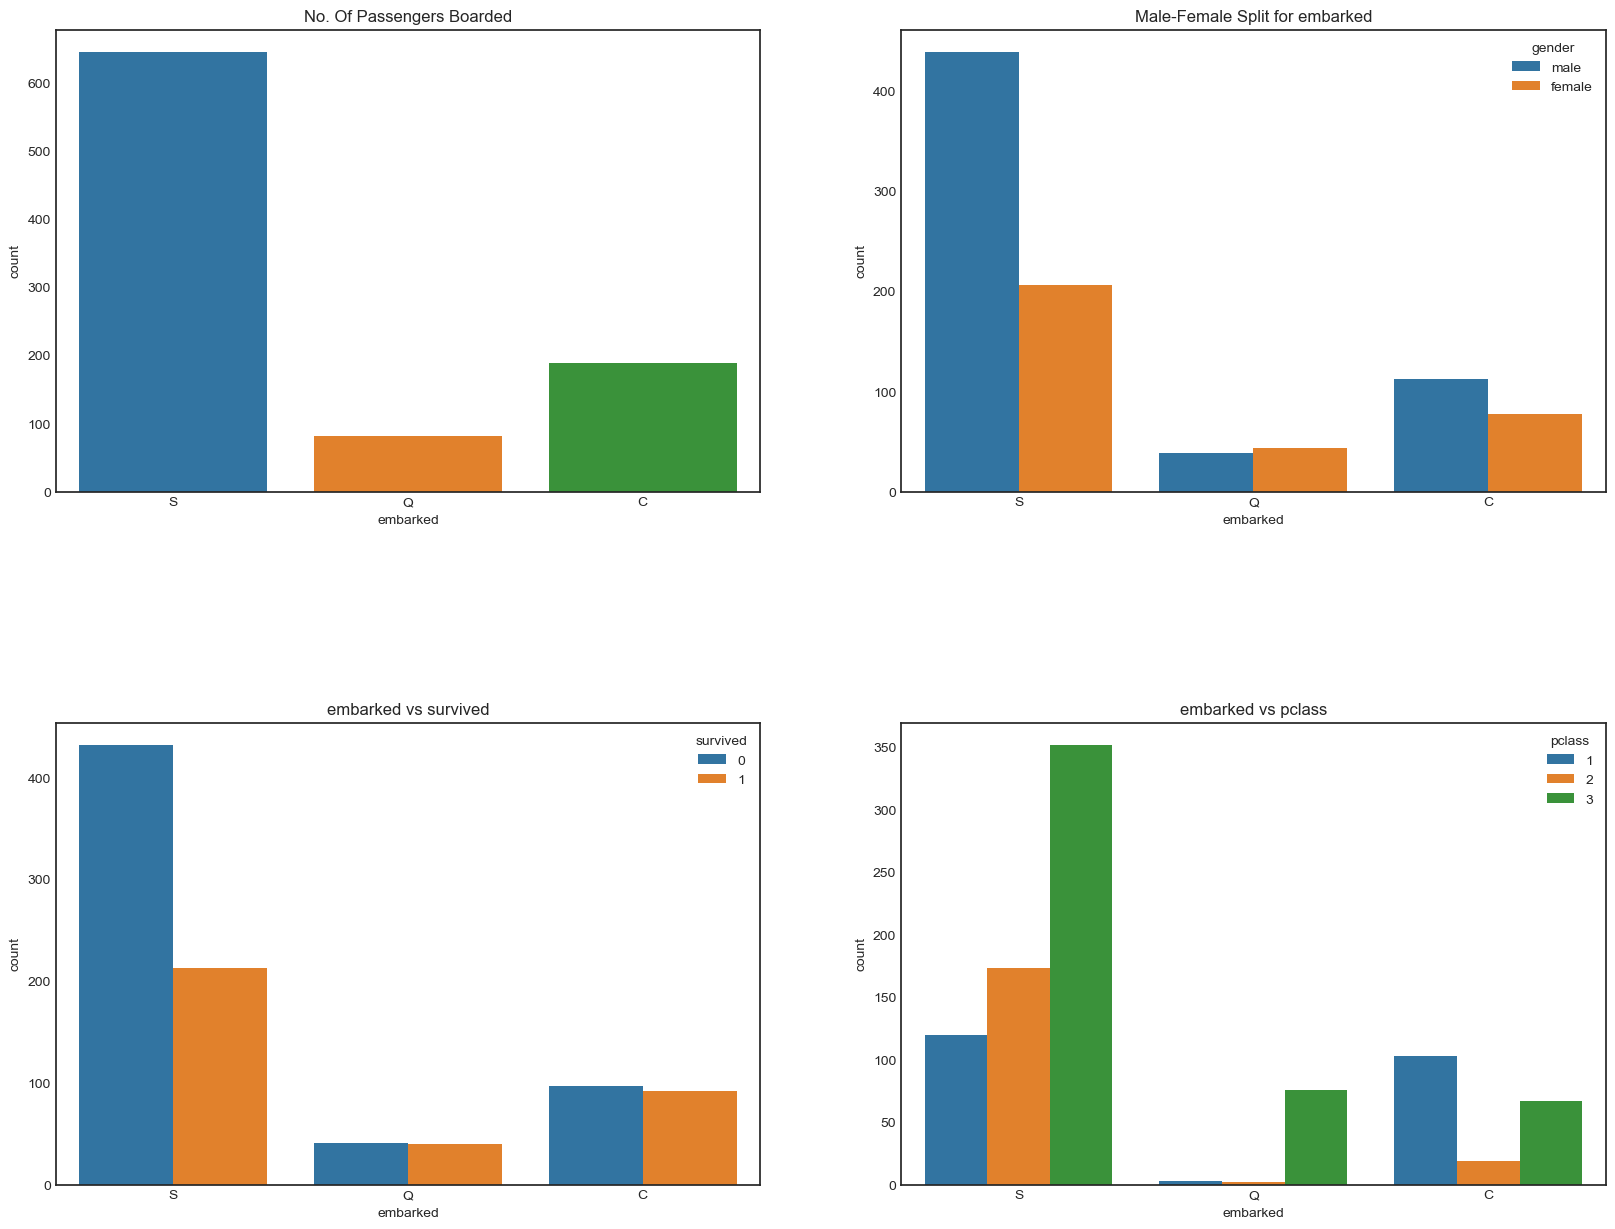

In [ ]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('embarked',data=ori_tr,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('embarked',hue='gender',data=ori_tr,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for embarked')
sns.countplot('embarked',hue='survived',data=ori_tr,ax=ax[1,0])
ax[1,0].set_title('embarked vs survived')
sns.countplot('embarked',hue='pclass',data=ori_tr,ax=ax[1,1])
ax[1,1].set_title('embarked vs pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

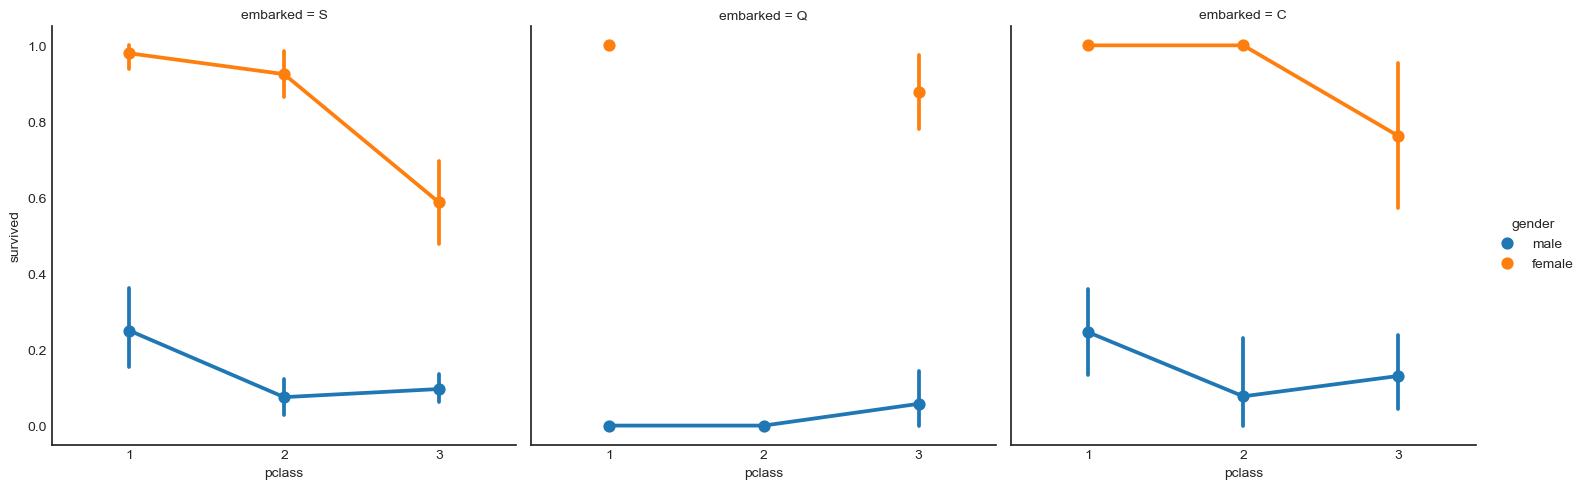

In [ ]:
sns.factorplot('pclass','survived',hue='gender',col='embarked',data=ori_tr)
plt.show()

Filling Embarked NaN

In [ ]:
ori_tr['embarked'].fillna('S',inplace=True)

In [ ]:
ori_tr.embarked.isnull().any()# Finally No NaN values

False

SibSip-->Discrete Feature

In [ ]:
ori_tr.cabin.isnull().sum()

718

In [ ]:
pd.crosstab([ori_tr.sibsp],ori_tr.survived).style.background_gradient(cmap='summer_r')

survived,0,1
sibsp,,
0,414,207
1,104,118
2,17,13
3,13,4
4,14,2
5,3,1
8,5,1


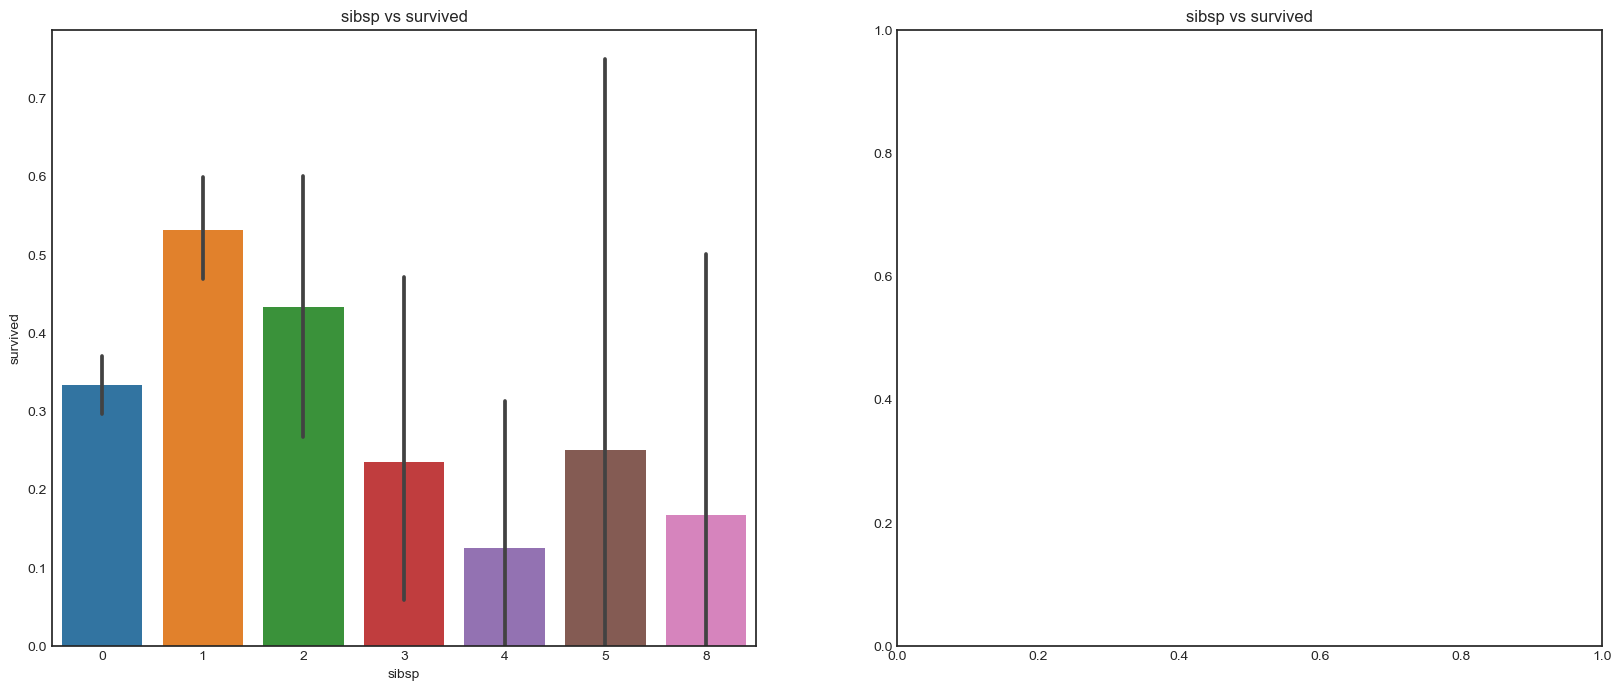

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('sibsp','survived',data=ori_tr,ax=ax[0])
ax[0].set_title('sibsp vs survived')
sns.factorplot('sibsp','survived',data=ori_tr,ax=ax[1])
ax[1].set_title('sibsp vs survived')
plt.close(2)
plt.show()

In [ ]:
pd.crosstab(ori_tr.sibsp,ori_tr.pclass).style.background_gradient(cmap='summer_r')

pclass,1,2,3
sibsp,,,
0,139,129,353
1,80,56,86
2,5,8,17
3,3,1,13
4,0,0,16
5,0,0,4
8,0,0,6


In [ ]:
pd.crosstab(ori_tr.parch, ori_tr.pclass).style.background_gradient(cmap='summer_r')

pclass,1,2,3
parch,,,
0,179,150,380
1,31,28,62
2,15,14,41
3,2,2,2
4,0,0,4
5,0,0,3
6,0,0,2
9,0,0,1


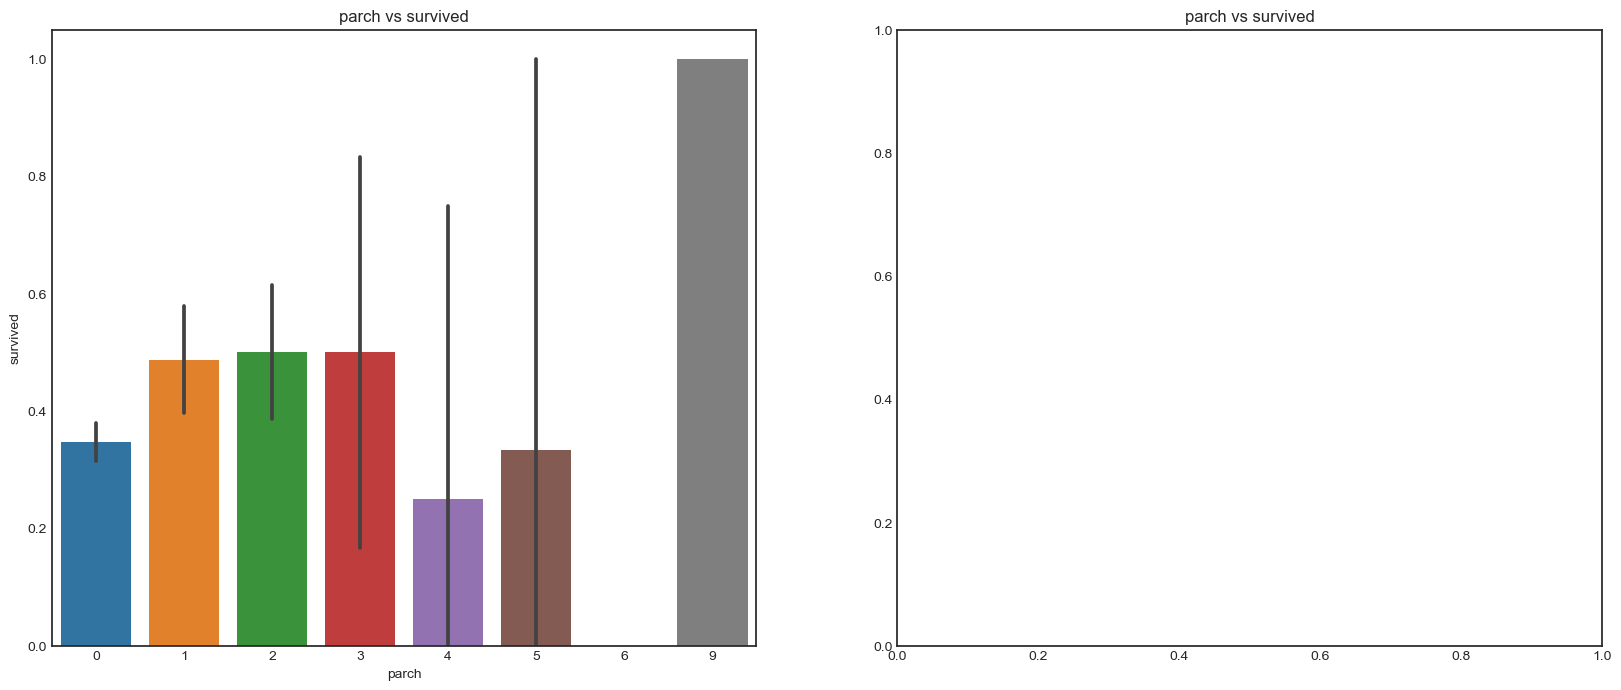

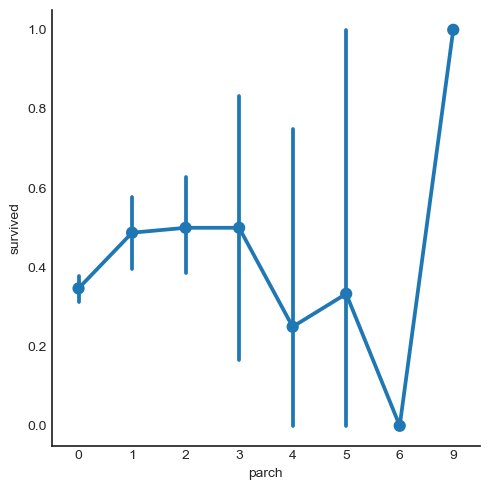

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('parch','survived',data=ori_tr,ax=ax[0])
ax[0].set_title('parch vs survived')
sns.factorplot('parch','survived',data=ori_tr,ax=ax[1])
ax[1].set_title('parch vs survived')
plt.show()

In [ ]:
print('Highest fare was:',ori_tr['fare'].max())
print('Lowest fare was:',ori_tr['fare'].min())
print('Average fare was:',ori_tr['fare'].mean())

Highest fare was: 512.3292
Lowest fare was: 0.0
Average fare was: 32.4027104803493


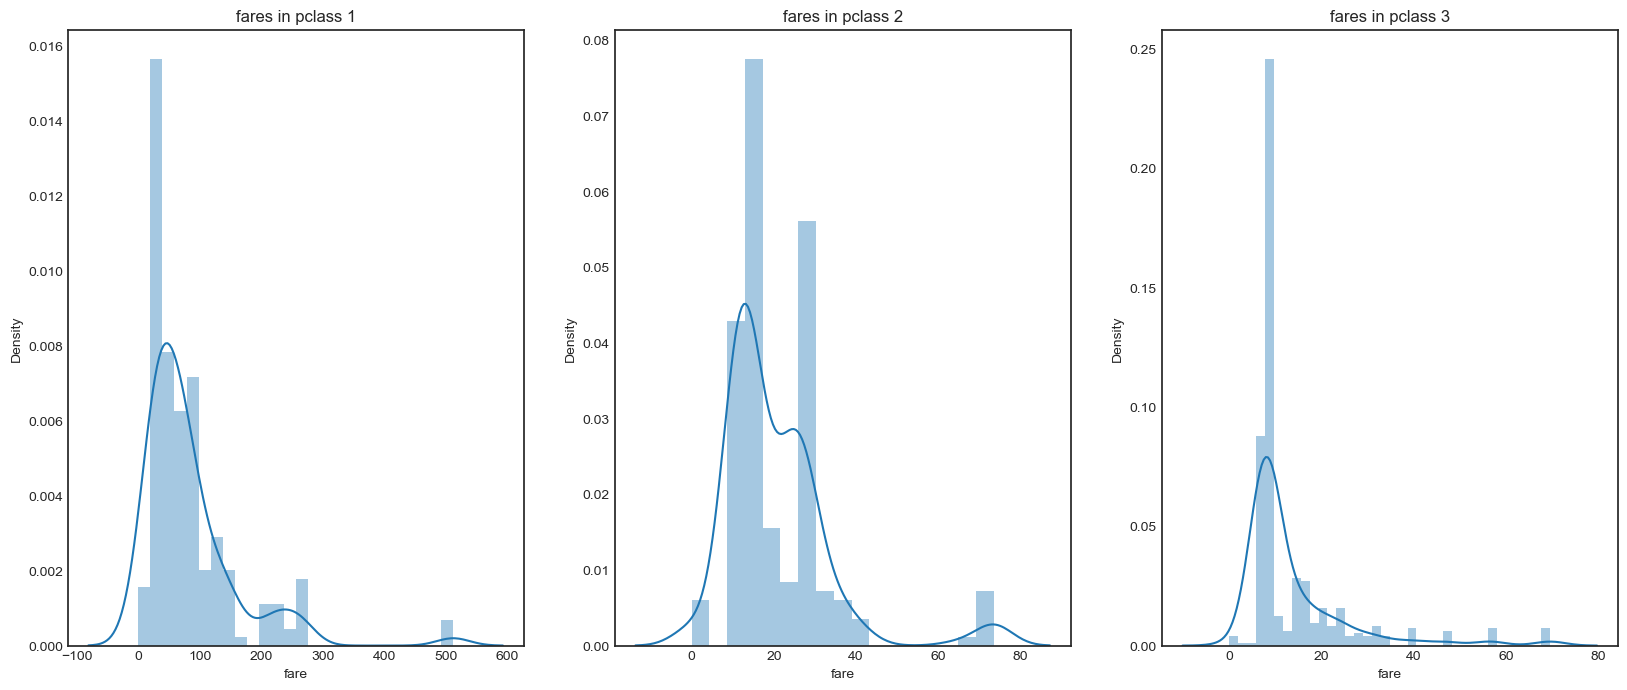

In [ ]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(ori_tr[ori_tr['pclass']==1].fare,ax=ax[0])
ax[0].set_title('fares in pclass 1')
sns.distplot(ori_tr[ori_tr['pclass']==2].fare,ax=ax[1])
ax[1].set_title('fares in pclass 2')
sns.distplot(ori_tr[ori_tr['pclass']==3].fare,ax=ax[2])
ax[2].set_title('fares in pclass 3')
plt.show()

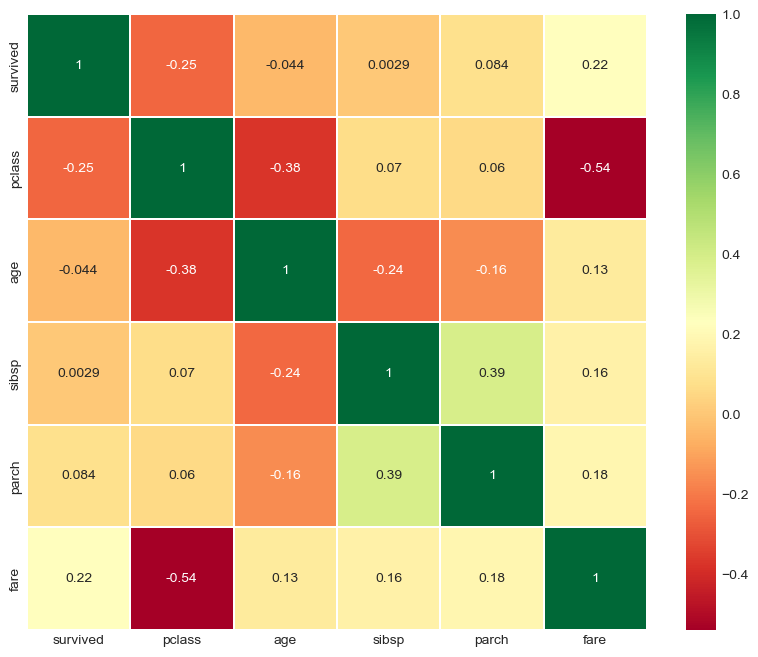

In [ ]:
sns.heatmap(ori_tr.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #ori_tr.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [ ]:
ori_tr['age_band']=0
ori_tr.loc[ori_tr['age']<=16,'age_band']=0
ori_tr.loc[(ori_tr['age']>16)&(ori_tr['age']<=32),'age_band']=1
ori_tr.loc[(ori_tr['age']>32)&(ori_tr['age']<=48),'age_band']=2
ori_tr.loc[(ori_tr['age']>48)&(ori_tr['age']<=64),'age_band']=3
ori_tr.loc[ori_tr['age']>64,'age_band']=4
ori_tr.head(2)

,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,initial,age_band
0,0,2,"Wheeler, Mr. Edwin Frederick""""",male,33.0,0,0,SC/PARIS 2159,12.875,NaN,S,Mr,2
1,0,3,"Henry, Miss. Delia",female,22.0,0,0,382649,7.750,NaN,Q,Miss,1


In [ ]:
ori_tr['age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')#checking the number of passenegers in each band

,age_band
1,411
2,331
0,98
3,66
4,10


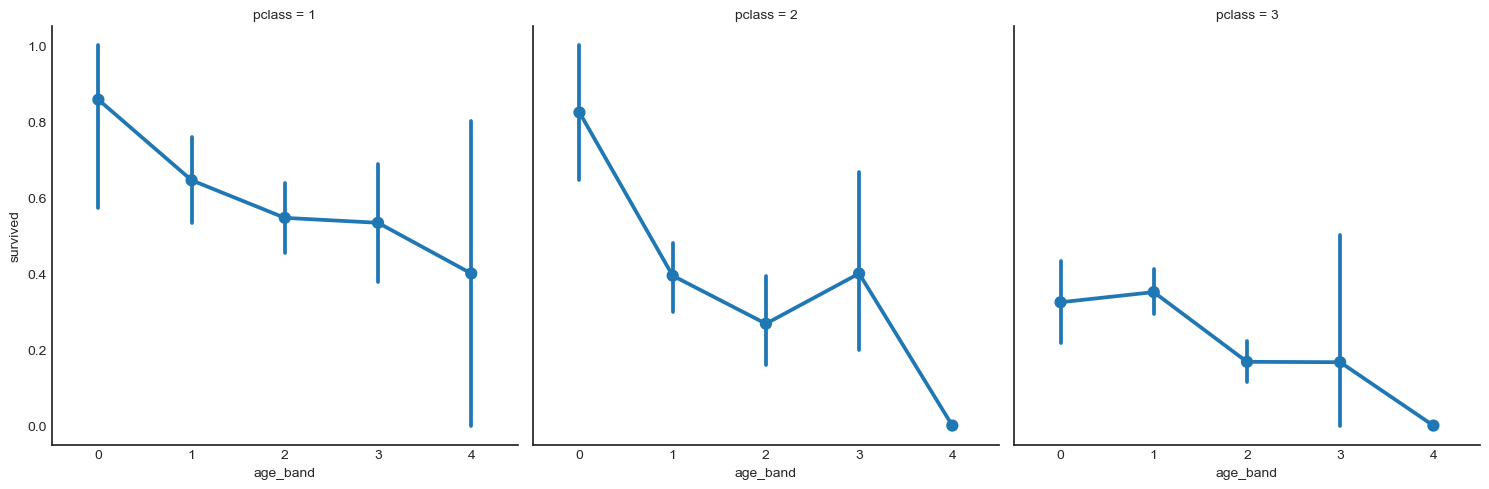

In [ ]:
sns.factorplot('age_band','survived',data=ori_tr,col='pclass')
plt.show()

In [ ]:
ori_tr['family_size']=0
ori_tr['family_size']=ori_tr['parch']+ori_tr['sibsp']#family size
ori_tr['alone']=0
ori_tr.loc[ori_tr.family_size==0,'alone']=1#Alone
ori_tr['family_size']

0      0
1      0
2      2
3      0
4      1
      ..
911    1
912    0
913    0
914    0
915    0
Name: family_size, Length: 916, dtype: int64

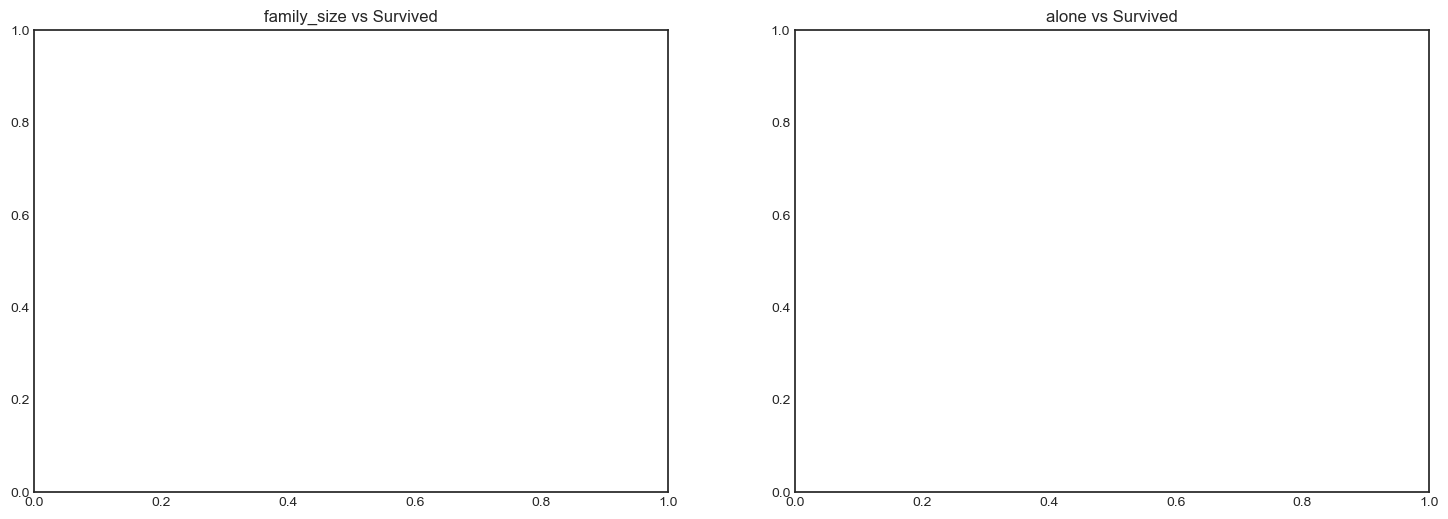

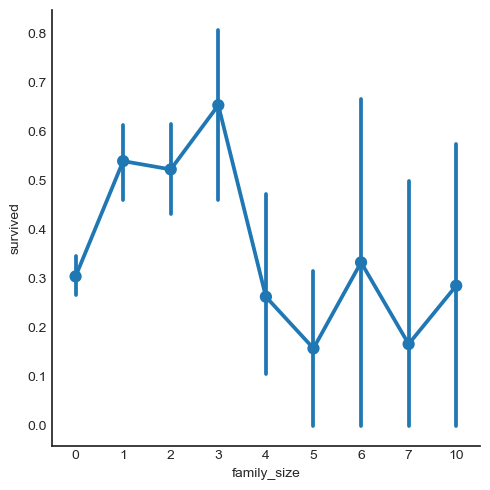

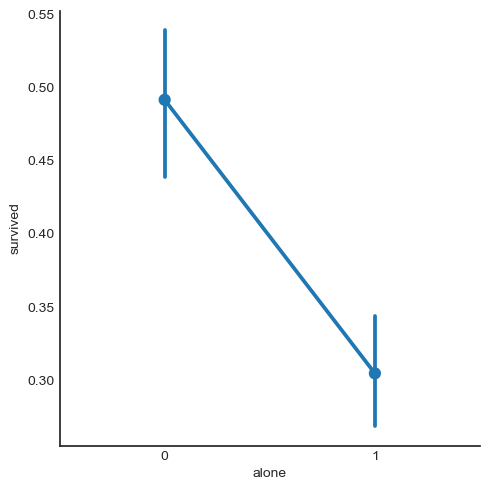

In [ ]:

f,ax=plt.subplots(1,2,figsize=(18,6))
sns.factorplot('family_size','survived', data=ori_tr,ax=ax[0])
ax[0].set_title('family_size vs Survived')
sns.factorplot('alone','survived', data=ori_tr,ax=ax[1])
ax[1].set_title('alone vs Survived')

plt.show()

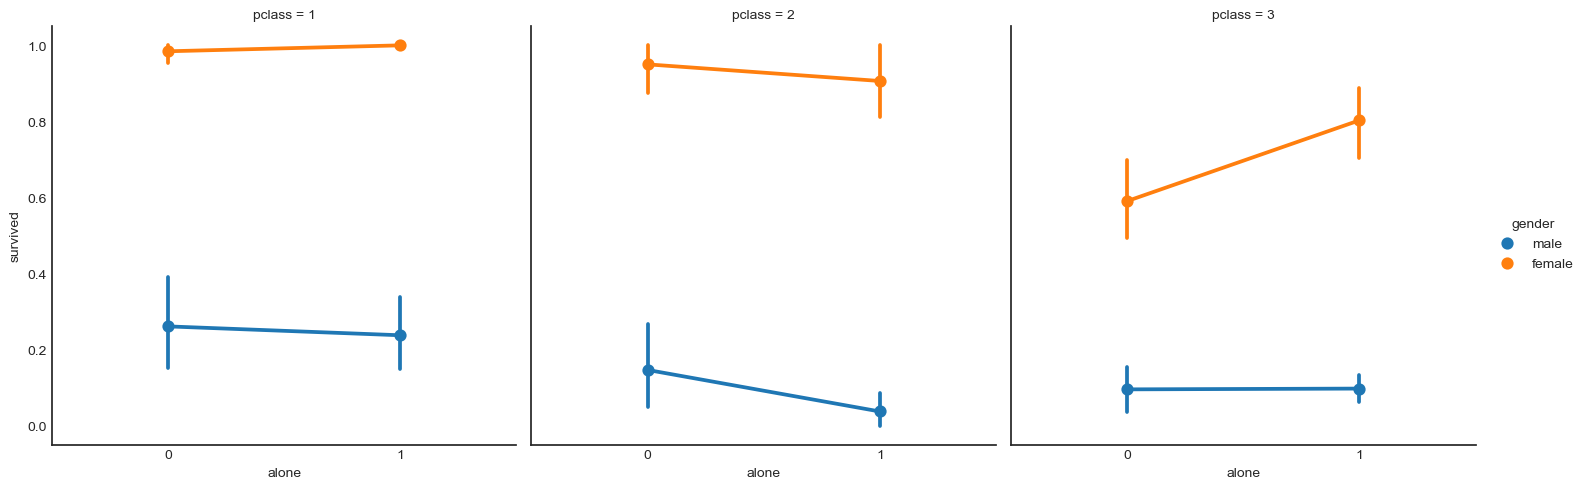

In [ ]:
sns.factorplot('alone','survived',data=ori_tr,hue='gender',col='pclass')
plt.show()

In [ ]:
ori_tr.head()

,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,initial,age_band,family_size,alone
0,0,2,"Wheeler, Mr. Edwin Frederick""""",male,33.0,0,0,SC/PARIS 2159,12.8750,NaN,S,Mr,2,0,1
1,0,3,"Henry, Miss. Delia",female,22.0,0,0,382649,7.7500,NaN,Q,Miss,1,0,1
2,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5000,B69,S,Mrs,3,2,0
3,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S,Mr,1,0,1
4,0,2,"Hold, Mr. Stephen",male,44.0,1,0,26707,26.0000,NaN,S,Mr,2,1,0


In [ ]:
ori_tr['fare_range']=pd.qcut(ori_tr['fare'],4)
ori_tr.groupby(['fare_range'])['survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,survived
fare_range,
"(-0.001, 7.896]",0.238095
"(7.896, 14.458]",0.275109
"(14.458, 30.018]",0.440529
"(30.018, 512.329]",0.558952


In [ ]:
ori_tr['fare_cat']=0
ori_tr.loc[ori_tr['fare']<=7.91,'fare_cat']=0
ori_tr.loc[(ori_tr['fare']>7.91)&(ori_tr['fare']<=14.454),'fare_cat']=1
ori_tr.loc[(ori_tr['fare']>14.454)&(ori_tr['fare']<=31),'fare_cat']=2
ori_tr.loc[(ori_tr['fare']>31)&(ori_tr['fare']<=513),'fare_cat']=3

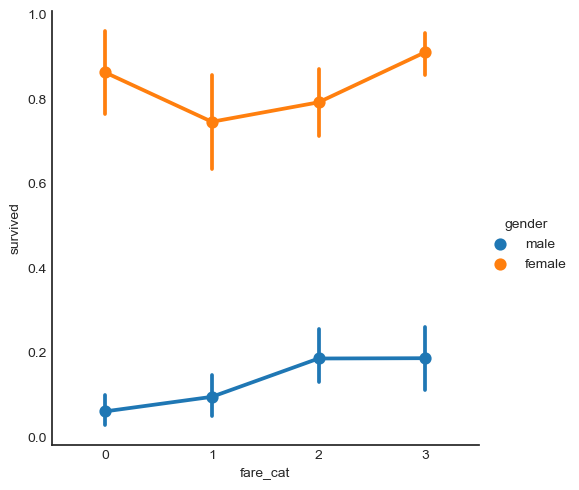

In [ ]:
sns.factorplot('fare_cat','survived',data=ori_tr,hue='gender')
plt.show()

In [ ]:
ori_train.head()

,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,2,"Wheeler, Mr. Edwin Frederick""""",male,NaN,0,0,SC/PARIS 2159,12.8750,NaN,S
1,0,3,"Henry, Miss. Delia",female,NaN,0,0,382649,7.7500,NaN,Q
2,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5000,B69,S
3,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S
4,0,2,"Hold, Mr. Stephen",male,44.0,1,0,26707,26.0000,NaN,S
